This code is going to be able to take a DAG in networkX and output a new dag that acts as a state machine for moving nondeterminately through the original DAG.

First Imports

In [1]:
# %pip install networkx pandas matplotlib scipy more-itertools

import pandas as pd
import numpy as np
import networkx as nx

C:\Users\ethan\AppData\Local\Temp\ipykernel_19536\2056595195.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Next Ill make 2 example DAGs:

![DAG1](DAG1.png)
![DAG2](DAG2.png)

In [7]:
dag1 = nx.DiGraph()
dag1.add_edges_from([("A", "C"), ("A", "D"), ("B", "D"), ("C", "D")])
# nx.draw(dag1, with_labels = True)

dag2 = nx.DiGraph()
dag2.add_edges_from([("A", "B"),("A", "C"), ("B", "D"), ("C", "D")])
# nx.draw(dag2, with_labels = True)

# Implementation

Given a DAG $G(E,V)$, return a state machine $M$

Starting with a stack with the empty state $\emptyset$

While the stack is not empty:
1) Choose a state $S$ from the stack
2) Find all in-degree 0 nodes $N$ in the induced subgraph of $G$ by $V-S$
3) Find possible moves by $S \cup m   \forall {m \in \mathcal{P}(N) - \emptyset}$
4) Add edges to $M$ from $S$ to all moves fround in 4.


In [35]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

def stateToString(state):
    s = sorted(state)
    return str(s)

def makeStateMachine(dag):
    dag2 = nx.DiGraph()
    stateStack = [[]]
    
    while len(stateStack) > 0:
        #pick a state from stack
        s = stateStack.pop()
        
        #find all in-degree 0 nodes with state removed
        dagCopy = dag.copy()
        dagCopy.remove_nodes_from(s)
        degs = list(dagCopy.in_degree())
        moves = [x[0] for x in degs if x[1]==0]
        # moves = list(filter(lambda x: x!=-1, moves))
        
        #find power set of possible moves (not including no move)
        # was tuples, so convert to lists
        pSet = [list(x) for x in powerset(moves)]
        
        #for each move, append to current state, and add to stack
        for p in pSet:
            n = s.copy()
            n.extend(p)
            dag2.add_edge(stateToString(s), stateToString(n))
            stateStack.append(n)
        
    #include self edges
    dag2.add_edges_from([(n,n) for n in dag2.nodes])
    return dag2
        
# stateMachine = makeStateMachine(dag1)
# nx.draw(stateMachine, with_labels=True)
    

# Validation of Code

### DAG 1
Expected:

![DAG1](DAG1.png)

Result:

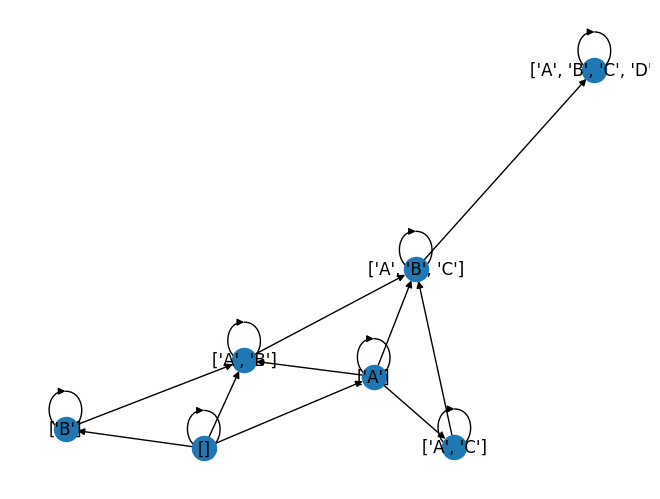

In [25]:
nx.draw(makeStateMachine(dag1), with_labels=True)

### DAG 2
Expected:

![DAG2](DAG2.png)

Result:

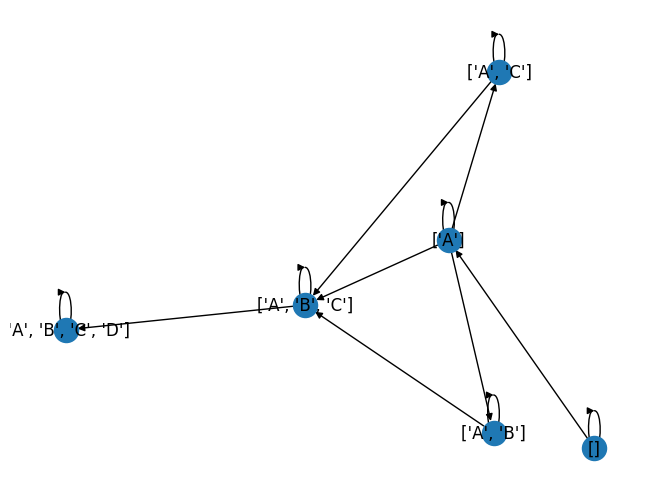

In [26]:
nx.draw(makeStateMachine(dag2), with_labels=True)

### DAG3
Expected:

![DAG3](DAG3.png)

Result:


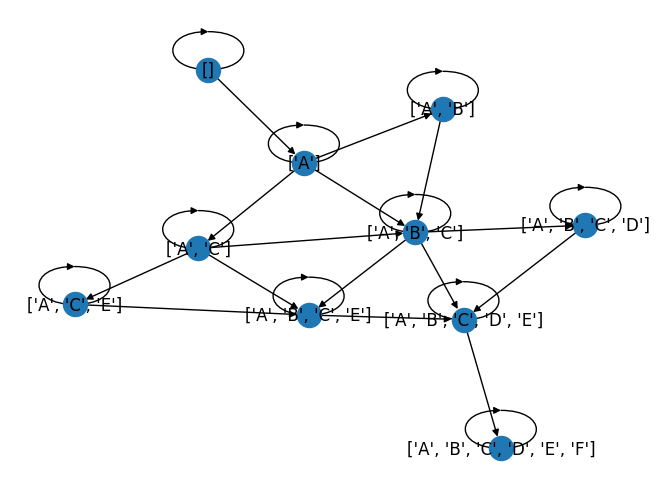

In [38]:
dag3=nx.DiGraph([("A","B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E"), ("D", "F"), ("E", "F")])
nx.draw(makeStateMachine(dag3), with_labels=True)